In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pydotplus
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns

from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from io import StringIO
from sklearn import tree
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

%matplotlib inline

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
df.shape

(346, 10)

In [4]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [5]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

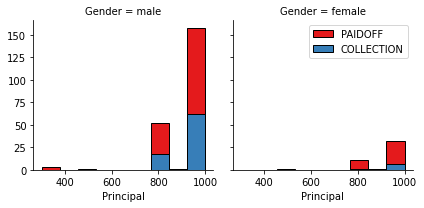

In [6]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

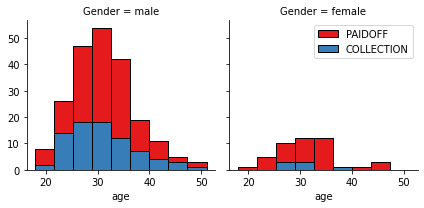

In [7]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

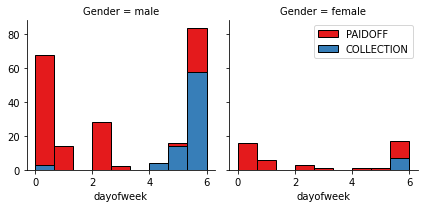

In [8]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [9]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [10]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [11]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [12]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [13]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [14]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [15]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [16]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [17]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# K Nearest Neighbor(KNN)

In [18]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [19]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.65714286, 0.58571429, 0.74285714, 0.7       , 0.74285714,
       0.71428571, 0.78571429, 0.75714286, 0.75714286])

In [20]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

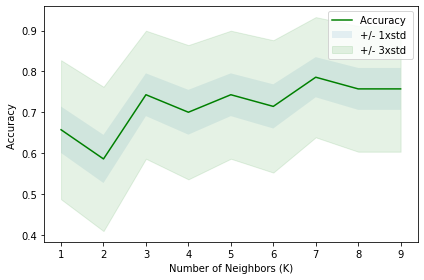

The best accuracy was with 0.7857142857142857 with k= 7


In [21]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [22]:
knn = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [23]:
knn_yhat = knn.predict(X_test)

# Decision Tree

In [24]:
ds = 10
mean_acc = np.zeros((ds-1))
std_acc = np.zeros((ds-1))

for d in range(1,ds):
    
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = d).fit(X_train, y_train)

    yhat=dt.predict(X_test)

    mean_acc[d-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[d-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
    print("For depth = {}  the accuracy score is {} ".format(d, mean_acc[d-1]))

For depth = 1  the accuracy score is 0.7857142857142857 
For depth = 2  the accuracy score is 0.7857142857142857 
For depth = 3  the accuracy score is 0.6142857142857143 
For depth = 4  the accuracy score is 0.6142857142857143 
For depth = 5  the accuracy score is 0.6428571428571429 
For depth = 6  the accuracy score is 0.7714285714285715 
For depth = 7  the accuracy score is 0.7571428571428571 
For depth = 8  the accuracy score is 0.7571428571428571 
For depth = 9  the accuracy score is 0.6571428571428571 


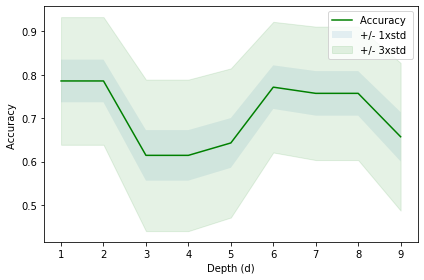

The best accuracy was with 0.7857142857142857 with d= 2


In [25]:
plt.plot(range(1,ds),mean_acc,'g')
plt.fill_between(range(1,ds),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,ds),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Depth (d)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with d=", mean_acc.argmax()+2) 

In [26]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth=2)
loanTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [27]:
predTree = loanTree.predict(X_test)

# Support Vector Machine

In [28]:
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train, y_train) 

SVC()

In [29]:
yhat = svm_model.predict(X_test)
yhat [0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

# Logistic Regression

In [30]:
for k in ('lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag'):
    LR_model = LogisticRegression(C = 0.01, solver = k).fit(X_train, y_train)
    LR_yhat = LR_model.predict(X_test)
    y_prob = LR_model.predict_proba(X_test)
    print('Solver: {}, logloss: {}'.format(k, log_loss(y_test, y_prob)))

Solver: lbfgs, logloss: 0.4920179847937498
Solver: saga, logloss: 0.49201681221362026
Solver: liblinear, logloss: 0.5772287609479654
Solver: newton-cg, logloss: 0.492017801467927
Solver: sag, logloss: 0.49202473613852016


In [31]:
LR_model = LogisticRegression(solver = 'liblinear', C=0.01).fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01, solver='liblinear')

In [32]:
yhat = LR_model.predict(X_test)
yhat[0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

# Model Evaluation using Test set

In [33]:
test_df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv')
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [34]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

test_feature = test_df[['Principal','terms','age','Gender','weekend']]
test_feature = pd.concat([test_feature,pd.get_dummies(test_df['education'])], axis=1)
test_feature.drop(['Master or Above'], axis = 1,inplace=True)

X_loan_test = test_feature

X_loan_test = preprocessing.StandardScaler().fit(X_loan_test).transform(X_loan_test)

y_loan_test = test_df['loan_status'].values

In [35]:
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [36]:
knn_yhat = knn.predict(X_loan_test)
knn_js = round(jaccard_score(y_loan_test, knn_yhat, pos_label = "PAIDOFF"), 2)
knn_f1 = round(f1_score(y_loan_test, knn_yhat, average = 'weighted'), 2)

loanTree_yhat = loanTree.predict(X_loan_test)
loanTree_js = round(jaccard_score(y_loan_test, loanTree_yhat, pos_label = "PAIDOFF"), 2)
loanTree_f1 = round(f1_score(y_loan_test, loanTree_yhat, average = 'weighted'), 2)

svm_model_yhat = svm_model.predict(X_loan_test)
svm_model_js = round(jaccard_score(y_loan_test, svm_model_yhat, pos_label = "PAIDOFF"), 2)
svm_model_f1 = round(f1_score(y_loan_test, svm_model_yhat, average = 'weighted'), 2)

LR_model_yhat = LR_model.predict(X_loan_test)
LR_model_js = round(jaccard_score(y_loan_test, LR_model_yhat, pos_label = "PAIDOFF"), 2)
LR_model_f1 = round(f1_score(y_loan_test, LR_model_yhat, average = 'weighted'), 2)
LR_model_logloss = round(log_loss(y_test, LR_model.predict_proba(X_test)),2)

In [37]:
Jaccard_scores = [knn_js, loanTree_js, svm_model_js, LR_model_js]
F1_scores = [knn_f1, loanTree_f1, svm_model_f1, LR_model_f1]
LogLoss_scores = ['NA', 'NA', 'NA', LR_model_logloss]


all_values = [Jaccard_scores, F1_scores, LogLoss_scores]

In [38]:
algorithms = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
metrics = ['Jaccard', 'F1-score', 'Logloss']

accuracy_df = pd.DataFrame(all_values, index = metrics, columns = algorithms)
accuracy_df.transpose()

,Jaccard,F1-score,Logloss
KNN,0.67,0.66,NA
Decision Tree,0.74,0.63,NA
SVM,0.78,0.76,NA
Logistic Regression,0.74,0.66,0.58
